# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

### Unzip it

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [143]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

### Visualize a photo from the training files and also print its label

In [119]:
import cv2 as cv

image_no = 500 # change this to a number between [0, 1200] and you can see a different training image
img = cv.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
cv.imshow("img", img)
cv.waitKey(0)
cv.destroyAllWindows()

An image with the label - running
(400, 300, 3)


# Human Motion Database 51 (HMDB51)
### Download the dataset

# Extract and organize the data.

In [ ]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar 
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar


# Load data into dataloaders with necessary transforms

In [17]:
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import torch
import transforms as T

torch.manual_seed(97)
num_frames = 16
clip_steps = 2
batch_size = 16

transform = transforms.Compose([ T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 T.RandomCrop((172, 172))])
transform_test = transforms.Compose([                           
                                 T.ToFloatTensorInZeroOne(),
                                 T.Resize((200, 200)),
                                 T.CenterCrop((172, 172))])


hmdb51_train = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames, frame_rate=5,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=transform, num_workers=2)

hmdb51_test = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames, frame_rate=5,
                                                step_between_clips = clip_steps, fold=1, train=False,
                                                transform=transform_test, num_workers=2)

train_loader = DataLoader(hmdb51_train, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(hmdb51_test, batch_size=batch_size, shuffle=False)

c:\Users\bais_\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 97/97 [00:22<00:00,  4.26it/s]
c:\Users\bais_\anaconda3\lib\site-packages\torchvision\datasets\video_utils.py:217: UserWarning: There aren't enough frames in the current video to get a clip for the given clip length and frames between clips. The video (and potentially others) will be skipped.
  warnings.warn(
100%|██████████| 97/97 [00:25<00:00,  3.81it/s]


# Let's print the data shape with batch size 16 and 16 frames.

In [44]:
for data, _, labels in train_loader:
  print(data.shape)  # 16-batch size, 3-channels, 16-frames, 172x172-crop
  print(labels)  # 12 classes [0-11]
  break

torch.Size([16, 3, 16, 172, 172])
tensor([6, 6, 9, 5, 6, 4, 1, 8, 8, 6, 4, 6, 6, 2, 4, 6])


# Processing Stanford 40 data

In [161]:
train_set, val_set = train_test_split(train_files, test_size=0.1, random_state=42, stratify=train_labels)
train_labs = ['_'.join(name.split('_')[:-1]) for name in train_set]
val_labs = ['_'.join(name.split('_')[:-1]) for name in val_set]

In [162]:
len(train_set), len(val_set)

(2459, 274)

In [168]:
from keras.utils import to_categorical

x_train = []
for i in range(len(train_set)):
    img = cv.imread(f'Stanford40/JPEGImages/{train_set[i]}')
    x_train.append(img)

# convert to desired size

# y_train = to_categorical(train_labs)

x_val = []
for i in range(len(val_set)):
    img = cv.imread(f'Stanford40/JPEGImages/{val_set[i]}')
    x_val.append(img)

# convert to desired size

# y_val = to_categorical(val_labs)


# Building Stanford CNN, training and testing

In [155]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization, Conv3D
from keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [123]:
def plot_loss(hist, model_name):
    # Function to plot both loss and accuracy on train and validation
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="Validation")
    plt.title(f"{model_name} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}.png")
    plt.show()
    plt.plot(hist.history['accuracy'], label="Train")
    plt.plot(hist.history['val_accuracy'], label="Validation")
    plt.title(f"{model_name} train and validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}_accuracy.png")
    plt.show()
    return

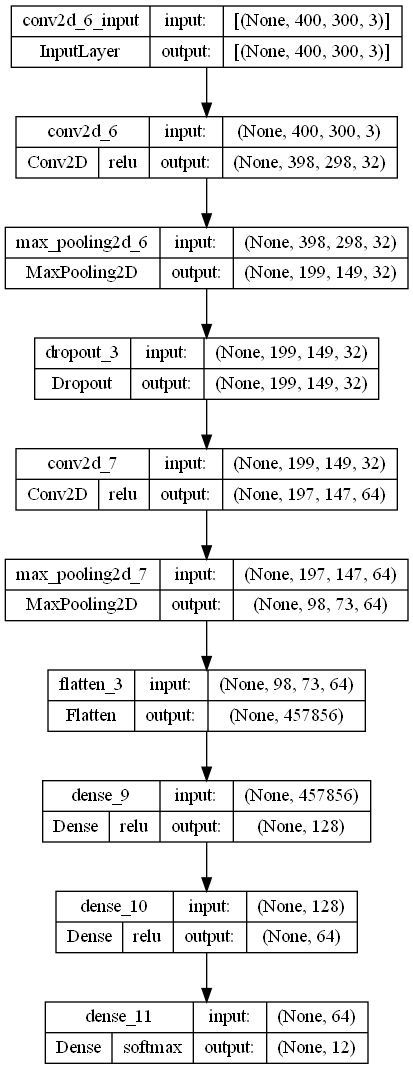

In [159]:
input_shape = (400, 300, 3) # to decide
num_classes = 12

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model2.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_activations=True)

In [ ]:
history = model.fit(x_train, train_labs, validation_data=(x_val, val_labs), epochs=15)

# Processing HMDB51 data

In [105]:
# splitting train 90-10 for validation
train_size = int(len(train_loader.dataset) * 0.9)
val_size = int(len(train_loader.dataset)) - train_size
train_subset, val_subset = random_split(train_loader.dataset, lengths = [train_size, val_size], generator=torch.Generator().manual_seed(42))

# reload data using DataLoaders
training_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True)

In [117]:
len(training_loader.dataset.indices), len(val_loader.dataset.indices)

(2680, 298)

In [110]:
# to iterate videos 
for video, _, label in training_loader.dataset:
    print(video.shape) # 3 channels, 16 frames, 172x172
    print(label)
    break
    

torch.Size([3, 16, 172, 172])
9
